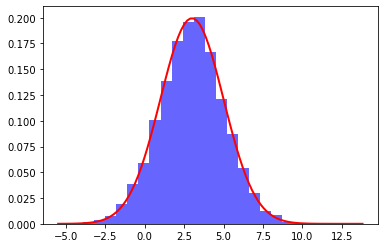

In [1]:
#Generate a normally distributed data, with mean=3 and standard deviation=2, for 10,000 observations:
#Plot the normal distribution overlaid on top of a histogram in matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu, sigma = 3, 2
s = np.random.normal(mu, sigma, 10000)

plt.hist(s, bins=25, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

plt.plot(x, p, 'r', linewidth=2)
plt.show()

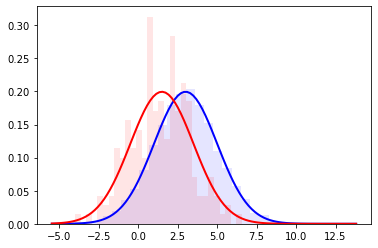

In [2]:
#Create a sub-sample of this population with mean of 1.5, a sigma of 2.0, and 200 observations.
sample_mean, sample_sigma = 1.5, 2
sample = np.random.normal(sample_mean, sample_sigma, 200)

plt.hist(s, bins=30, density=True, alpha=0.1, color='b')
plt.hist(sample, bins=30, density=True, alpha=0.1, color='r')

plt.plot(x, p, 'b', linewidth=2)

p1 = norm.pdf(x, sample_mean, sample_sigma)
plt.plot(x, p1, 'r', linewidth=2)

plt.show()

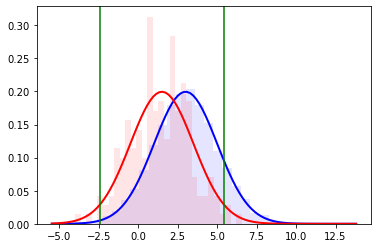

In [3]:
#Use ‘from scipy.stats import norm’ to create 95% confidence intervals. Consider the interval as plt.axvline(ci[0],color='g'). plt.axvline(ci[1],color='g')z. 

#plotting the previous graph
plt.hist(s, bins=30, density=True, alpha=0.1, color='b')
plt.hist(sample, bins=30, density=True, alpha=0.1, color='r')
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x, p1, 'r', linewidth=2)

#Adding the confidence interval
ci=norm.interval(0.95,loc=sample_mean,scale=sample_sigma)
plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')
plt.show()

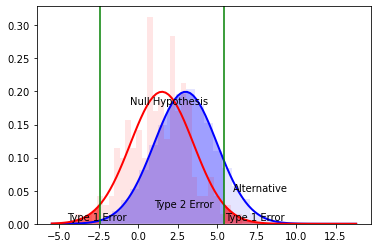

In [4]:
#Create a graph that shows the null and hypotheses, the type 1 and 2 errors that looks like this:
import scipy
#plotting the previous graph
plt.hist(s, bins=30, density=True, alpha=0.1, color='b')
plt.hist(sample, bins=30, density=True, alpha=0.1, color='r')
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x, p1, 'r', linewidth=2)
plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')

#Type 1 error
x1 = np.arange(-5.0,ci[0],0.05)
y1 = scipy.stats.norm(sample_mean,sample_sigma).pdf(x1)
plt.fill_between(x=x1, y1 = y1,facecolor='red',alpha=0.6)

x2 = np.arange(ci[1],10)
y2 = scipy.stats.norm(sample_mean,sample_sigma).pdf(x2)
plt.fill_between(x=x2, y1 = y2, facecolor='red', alpha=0.6)

#Type2 error
x3 = np.arange(ci[0],ci[1],0.001)
y3 = scipy.stats.norm(mu,sigma).pdf(x3)
plt.fill_between(x=x3, y1 = y3, facecolor='blue', alpha=0.3)

plt.text(x=-4.5, y=0.005, s= "Type 1 Error")
plt.text(x=5.5, y=0.005, s= "Type 1 Error")
plt.text(x=1.0, y=0.025, s= "Type 2 Error")
plt.text(x=6, y=0.05, s= "Alternative")
plt.text(x=-0.5, y=0.18, s= "Null Hypothesis")

plt.show()

In [5]:
#Compute the z-score, which is equal to (sample mean – mu)/sigma. What is the p-value and do you reject it?
zscore=(sample_mean-mu)/sigma
print('The z-score is',zscore)

pvalue = norm.sf(abs(zscore)*2)
if(pvalue < 0.05):
    print("Since p-value: %0.2f is less than 0.05, we reject the null hypothesis." %pvalue)
else:
    print("Since p-value: %0.2f is grater than 0.05, we do not reject the null hypothesis." %pvalue)

The z-score is -0.75
Since p-value: 0.07 is grater than 0.05, we do not reject the null hypothesis.
